In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import os
from PIL import Image
print(os.listdir("./common/data"))

import tensorflow as tf

config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session(config=config))

# Keras Libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

['chest_xray', 'resampled', 'TEST']


Using TensorFlow backend.


# Resample Data Into New Dataset

# Resample Train Data

In [2]:
from common.src import resample as res

In [3]:
from imblearn.over_sampling import ADASYN

path = r'C:\Users\mmitk\dev\2020\pneumonia\common\data\chest_xray\train'
ads = ADASYN(random_state=0)

In [4]:
res.resample_directory(ads, path, 'ADASYN', val = False)

# Load Data

In [5]:
train_folder= './common/data/resampled/ADASYN/train'
val_folder = './common/data/chest_xray/val/'
test_folder = './common/data/chest_xray/test/'

In [6]:
# train 
os.listdir(train_folder)
train_n = train_folder+'NORMAL/'
train_p = train_folder+'PNEUMONIA/'

In [7]:
# test
os.listdir(test_folder)
train_n = test_folder+'NORMAL/'
train_p = test_folder+'PNEUMONIA/'

In [8]:
from common.src import util

train_datagen = util.create_train_datagen()
test_datagen = util.create_test_datagen()

training_set = util.create_generator_set(train_datagen, './common/data/resampled/ADASYN/train')
validation_generator = util.create_generator_set(test_datagen, './common/data/chest_xray/val/')
test_set = util.create_generator_set(test_datagen, './common/data/chest_xray/test/', batch_size = 1, shuffle = False) 

Found 7666 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# Create Model

In [9]:
from common.src import models

cnn = models.CNNModel(patience_s=49)
cnn.create_model()
cnn.summary()

# Fit Model

In [10]:
cnn_model = cnn.fit_generator(training_set, validation_generator, epochs=50)

Epoch 1/50
163/163 [==============================] - 11s 65ms/step - loss: 0.3263 - tp: 4388.0000 - fp: 863.0000 - tn: 4339.0000 - fn: 814.0000 - accuracy: 0.8388 - precision: 0.8357 - recall: 0.8435 - auc: 0.9339 - val_loss: 0.4946 - val_tp: 209.0000 - val_fp: 95.0000 - val_tn: 209.0000 - val_fn: 95.0000 - val_accuracy: 0.6875 - val_precision: 0.6875 - val_recall: 0.6875 - val_auc: 0.8516
Epoch 2/50
163/163 [==============================] - 9s 57ms/step - loss: 0.1998 - tp: 4791.0000 - fp: 426.0000 - tn: 4790.0000 - fn: 425.0000 - accuracy: 0.9184 - precision: 0.9183 - recall: 0.9185 - auc: 0.9755 - val_loss: 0.4047 - val_tp: 228.0000 - val_fp: 57.0000 - val_tn: 247.0000 - val_fn: 76.0000 - val_accuracy: 0.7812 - val_precision: 0.8000 - val_recall: 0.7500 - val_auc: 0.8828
Epoch 3/50
163/163 [==============================] - 9s 57ms/step - loss: 0.1649 - tp: 4861.0000 - fp: 344.0000 - tn: 4858.0000 - fn: 341.0000 - accuracy: 0.9342 - precision: 0.9339 - recall: 0.9344 - auc: 0.9835

Epoch 22/50
163/163 [==============================] - 9s 56ms/step - loss: 0.0946 - tp: 5025.0000 - fp: 203.0000 - tn: 5013.0000 - fn: 191.0000 - accuracy: 0.9622 - precision: 0.9612 - recall: 0.9634 - auc: 0.9944 - val_loss: 0.5237 - val_tp: 209.0000 - val_fp: 95.0000 - val_tn: 209.0000 - val_fn: 95.0000 - val_accuracy: 0.6875 - val_precision: 0.6875 - val_recall: 0.6875 - val_auc: 0.8457
Epoch 23/50
163/163 [==============================] - 9s 56ms/step - loss: 0.1004 - tp: 5001.0000 - fp: 209.0000 - tn: 4993.0000 - fn: 201.0000 - accuracy: 0.9606 - precision: 0.9599 - recall: 0.9614 - auc: 0.9935 - val_loss: 0.3684 - val_tp: 247.0000 - val_fp: 57.0000 - val_tn: 247.0000 - val_fn: 57.0000 - val_accuracy: 0.8125 - val_precision: 0.8125 - val_recall: 0.8125 - val_auc: 0.9102
Epoch 24/50
163/163 [==============================] - 9s 57ms/step - loss: 0.0869 - tp: 5055.0000 - fp: 161.0000 - tn: 5055.0000 - fn: 161.0000 - accuracy: 0.9691 - precision: 0.9691 - recall: 0.9691 - auc: 0.99

Epoch 43/50
163/163 [==============================] - 9s 57ms/step - loss: 0.0692 - tp: 5076.0000 - fp: 141.0000 - tn: 5075.0000 - fn: 140.0000 - accuracy: 0.9731 - precision: 0.9730 - recall: 0.9732 - auc: 0.9969 - val_loss: 0.2859 - val_tp: 266.0000 - val_fp: 38.0000 - val_tn: 266.0000 - val_fn: 38.0000 - val_accuracy: 0.8750 - val_precision: 0.8750 - val_recall: 0.8750 - val_auc: 0.9395
Epoch 44/50
163/163 [==============================] - 9s 56ms/step - loss: 0.0691 - tp: 5072.0000 - fp: 126.0000 - tn: 5076.0000 - fn: 130.0000 - accuracy: 0.9754 - precision: 0.9758 - recall: 0.9750 - auc: 0.9966 - val_loss: 0.5251 - val_tp: 228.0000 - val_fp: 76.0000 - val_tn: 228.0000 - val_fn: 76.0000 - val_accuracy: 0.7500 - val_precision: 0.7500 - val_recall: 0.7500 - val_auc: 0.8652
Epoch 45/50
163/163 [==============================] - 9s 57ms/step - loss: 0.0637 - tp: 5093.0000 - fp: 125.0000 - tn: 5091.0000 - fn: 123.0000 - accuracy: 0.9762 - precision: 0.9760 - recall: 0.9764 - auc: 0.99

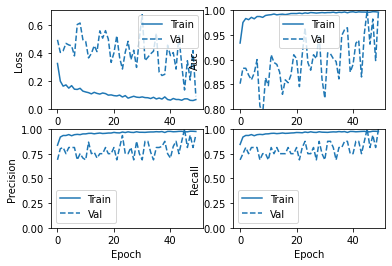

In [11]:
cnn.plot_history()

In [12]:
cnn.get_classification_report(test_set)

              precision    recall  f1-score   support

      NORMAL       0.93      0.86      0.89       234
   PNEUMONIA       0.92      0.96      0.94       390

    accuracy                           0.92       624
   macro avg       0.92      0.91      0.92       624
weighted avg       0.92      0.92      0.92       624



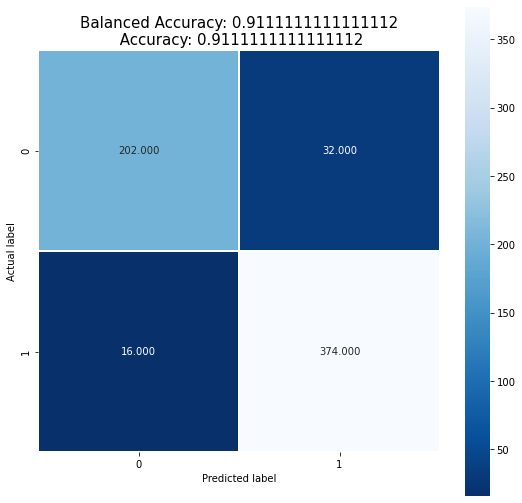

In [13]:
cnn.display_confusion_matrix(test_set)